In [1]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
#THE DATASET 
movie_reviews = pd.read_csv("F:\ML solving\IMDB Dataset.csv")

In [3]:
#CHECKING IF THERE ARE ANY NULL VALUE PRESENT OR NOT
movie_reviews.isnull().values.any()
#REVIEWING THE SHAPE OF THE DATSET (HERE 50000 is the total number of data and 2 is the number of attributes present)
movie_reviews.shape

(50000, 2)

In [4]:
#CHECKING THE HEAD OF THE DATASET
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#CHECKING THE TAIL OF THE DATSET
movie_reviews.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [6]:
#RIVIEWING SAMPLE MOVIE REVIEWS (HAVE TO CLEAN THE DATA)
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

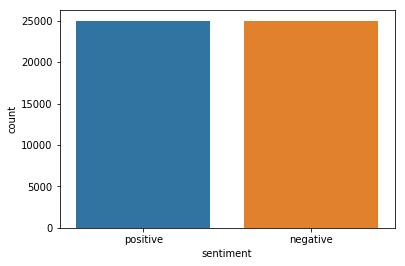

In [8]:
#CHECKING POSITIVE VS NEGETIVE SENTIMENT
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

In [9]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
TAG_RE = re.compile(r'<[^>]+>')

In [10]:
def remove_tags(text):
    return TAG_RE.sub('', text)

In [11]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [12]:
#RETRIEIVNG THE CLEAN DATA
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [13]:
#CHANGINT THE POSITIVE AND NEGETIVE LABELS INTO 0 AND 1
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [16]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [18]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('F:\ML Projects\glove.6B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [21]:
#DEFINING THE EMBEDDED MATRIX
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [23]:
#TEXT CLASSIFICATIOON USING SIMPLE NEURAL NETWORKS
model = Sequential()
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [24]:
#MODEL SUMMARY
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 300)          27764100  
_________________________________________________________________
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 30001     
Total params: 27,794,101
Trainable params: 30,001
Non-trainable params: 27,764,100
_________________________________________________________________
None


In [25]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
  256/32000 [..............................] - ETA: 21:42 - loss: 0.6967 - acc: 0.5117

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.108426). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


32000/32000 [==============================] - 16s 511us/step - loss: 0.5385 - acc: 0.7247 - val_loss: 0.4807 - val_acc: 0.7700
Epoch 2/6
32000/32000 [==============================] - 5s 153us/step - loss: 0.3919 - acc: 0.8269 - val_loss: 0.4777 - val_acc: 0.7728
Epoch 3/6
32000/32000 [==============================] - 5s 153us/step - loss: 0.3342 - acc: 0.8617 - val_loss: 0.4924 - val_acc: 0.7710
Epoch 4/6
32000/32000 [==============================] - 5s 157us/step - loss: 0.2960 - acc: 0.8789 - val_loss: 0.5089 - val_acc: 0.7671
Epoch 5/6
32000/32000 [==============================] - 5s 161us/step - loss: 0.2658 - acc: 0.8964 - val_loss: 0.5244 - val_acc: 0.7660
Epoch 6/6
32000/32000 [==============================] - 5s 158us/step - loss: 0.2446 - acc: 0.9082 - val_loss: 0.5763 - val_acc: 0.7524


In [26]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 2s 165us/step


In [27]:
#PRINTING THE TEST SCORE AND ACCURACY BY IMPLEMENTING SIMPLE NEURAL NETWORK
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5860652648448944
Test Accuracy: 0.7537000179290771


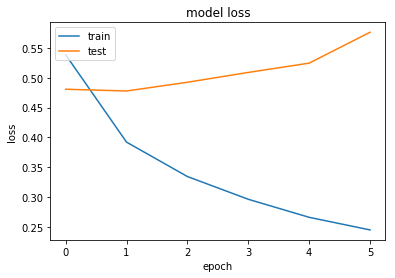

In [31]:
#PLOTTING THE LOSS OF THE MODEL
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()